In [1]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib

%matplotlib inline

In [2]:
# Read Movies csv File

moviesFP = "E:\\20201\\ai\\data\\small\\movies.csv"
moviesDF = pd.read_csv(moviesFP)
# Read Ratings CSV File

ratingsFP = "E:\\20201\\ai\\data\\small\\ratings.csv"
ratingsDF = pd.read_csv(ratingsFP)
# moviesDF.head()
# Read Tasg CSV File

tagsFP = "E:\\20201\\ai\\data\\small\\tags.csv"
tagsDF = pd.read_csv(tagsFP)

tempDF = pd.merge(ratingsDF,tagsDF,on=['userId','movieId'],how='left') # Gop 2 bang theo
# tempDF.head()

mergedDF = pd.merge(tempDF,moviesDF,on=['movieId'],how='left')
# mergedDF.head()
# Data Rows with Null Values

mergedDF.isna().sum()


userId             0
movieId            0
rating             0
timestamp_x        0
tag            99201
timestamp_y    99201
title              0
genres             0
dtype: int64

In [3]:
#Đếm số lượng phim thuộc thể loại
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue
        for s in liste_keywords: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords  by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    # print(keyword_occurences)
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    # print(keyword_occurences)
    return keyword_occurences, keyword_count

In [4]:
#here we  make census of the genres:
genre_labels = set()
for s in mergedDF['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [5]:
#counting how many times each of genres occur:
keyword_occurences, dum = count_word(mergedDF, 'genres', genre_labels)
keyword_occurences

[['Drama', 43024],
 ['Comedy', 39622],
 ['Action', 31151],
 ['Thriller', 27175],
 ['Adventure', 24497],
 ['Romance', 18353],
 ['Sci-Fi', 17691],
 ['Crime', 17224],
 ['Fantasy', 11989],
 ['Children', 9285],
 ['Mystery', 7906],
 ['Horror', 7408],
 ['Animation', 7119],
 ['War', 4931],
 ['IMAX', 4258],
 ['Musical', 4170],
 ['Western', 1966],
 ['Documentary', 1259],
 ['Film-Noir', 880],
 ['(no genres listed)', 49]]

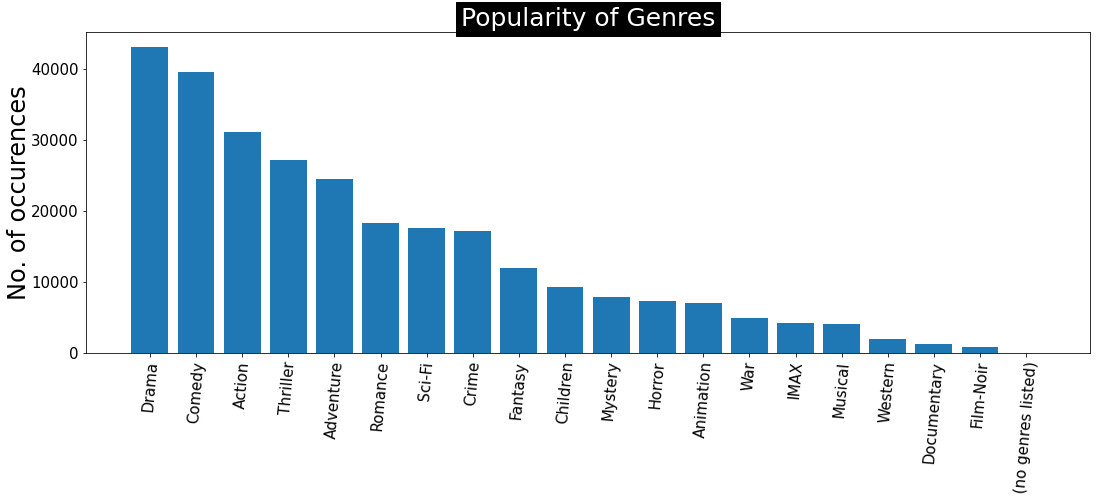

In [6]:
# Graph the Genres vs Occurrences
fig = plt.figure(1, figsize=(18,13))
ax2 = fig.add_subplot(2,1,2)
y_axis = [i[1] for i in keyword_occurences]
x_axis = [k for k,i in enumerate(keyword_occurences)]
x_label = [i[0] for i in keyword_occurences]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x_axis, x_label)
plt.ylabel("No. of occurences", fontsize = 24, labelpad = 0)
ax2.bar(x_axis, y_axis, align = 'center')
plt.title("Popularity of Genres",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [7]:
# Convert Genres in row to Columns
# New Column is created for every genre

tempDF = mergedDF

for (key,cnt) in keyword_occurences:
    tempDF.loc[tempDF['genres'].str.contains(key), key] = 1
    # print(tempDF)
    tempDF[key] = tempDF[key].fillna(0)


# tempDF.head()

In [8]:
tempDF.head()

,userId,movieId,rating,timestamp_x,tag,timestamp_y,title,genres,Drama,Comedy,...,Mystery,Horror,Animation,War,IMAX,Musical,Western,Documentary,Film-Noir,(no genres listed)
0,1,1,4.0,964982703,NaN,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,NaN,NaN,Grumpier Old Men (1995),Comedy|Romance,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,NaN,NaN,Heat (1995),Action|Crime|Thriller,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,5.0,964983815,NaN,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,5.0,964982931,NaN,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#tempDF = tempDF.drop(columns=['tag','title','genres','timestamp_y'])

# Drop Unncecessary Columns

tempDF = tempDF.drop(columns=['title','genres','timestamp_y'])

In [10]:
tempDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   userId              102677 non-null  int64  
 1   movieId             102677 non-null  int64  
 2   rating              102677 non-null  float64
 3   timestamp_x         102677 non-null  int64  
 4   tag                 3476 non-null    object 
 5   Drama               102677 non-null  float64
 6   Comedy              102677 non-null  float64
 7   Action              102677 non-null  float64
 8   Thriller            102677 non-null  float64
 9   Adventure           102677 non-null  float64
 10  Romance             102677 non-null  float64
 11  Sci-Fi              102677 non-null  float64
 12  Crime               102677 non-null  float64
 13  Fantasy             102677 non-null  float64
 14  Children            102677 non-null  float64
 15  Mystery             102677 non-nul

In [11]:
tempDF['tag'] = tempDF['tag'].fillna('')

In [12]:
# Use tfidf for creating feature vectors tags

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(tempDF['tag'])

In [13]:
ftr = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())
# print(ftr)

In [14]:
tempDF = tempDF.drop(columns=['tag'])

In [15]:
# Concat Features data to actual data

ftrDF = pd.concat([tempDF, ftr], axis=1)
ftrDF.head()

,userId,movieId,rating,timestamp_x,Drama,Comedy,Action,Thriller,Adventure,Romance,...,wrongful,wry,york,younger,zellweger,zither,zoe,zombie,zombies,zooey
0,1,1,4.0,964982703,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4.0,964981247,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,6,4.0,964982224,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,47,5.0,964983815,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,50,5.0,964982931,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Run K-means Clustering - with clusters count as 0
# 0 because of number of genres

from sklearn.cluster import KMeans
# Initializing KMeans

kmeans = KMeans(n_clusters=50)
# Fitting with inputs
kmeans = kmeans.fit(ftrDF)
# Predicting the clusters
labels = kmeans.predict(ftrDF)
# Getting the cluster centers
C = kmeans.cluster_centers_


In [27]:
clustersvdf=kmeans.fit_predict(ftrDF)

In [116]:
clusters = []
for i in labels: 
    if i not in clusters:
        clusters.append(i)
print(len(clusters))

50


In [28]:
mergedDF.iloc[list(np.where(clustersvdf==0))[0]]['title'].unique()[:10]

array(['Ace Ventura: When Nature Calls (1995)', 'Get Shorty (1995)',
       "Mr. Holland's Opus (1995)", 'Die Hard: With a Vengeance (1995)',
       'Dumb & Dumber (Dumb and Dumber) (1994)', 'Outbreak (1995)',
       'Maverick (1994)', 'In the Line of Fire (1993)',
       'Dances with Wolves (1990)', 'Nutty Professor, The (1996)'],
      dtype=object)

## Mean Shift Clustering Algorithm

In [22]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import MeanShift
from matplotlib import pyplot
model = MeanShift()
# fit model and predict clusters
yhat = model.fit_predict(ftrDF[:1000])
# retrieve unique clusters
clusters = unique(yhat)

In [26]:
print(len(ftrDF))

102677


In [27]:
yhat = model.fit_predict(ftrDF)

KeyboardInterrupt: 

In [25]:
print(yhat)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1
 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 1 0 1 0 